# 생선 길이로 무게 예측

- 회귀(regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관계를 분석하는 방법

- KNN회귀
    1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
    2. k개의 샘플의 종속 변수 값의 평균을 구함
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("./data/Fish.csv")

In [4]:
# 농어데이터만 사용
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [5]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


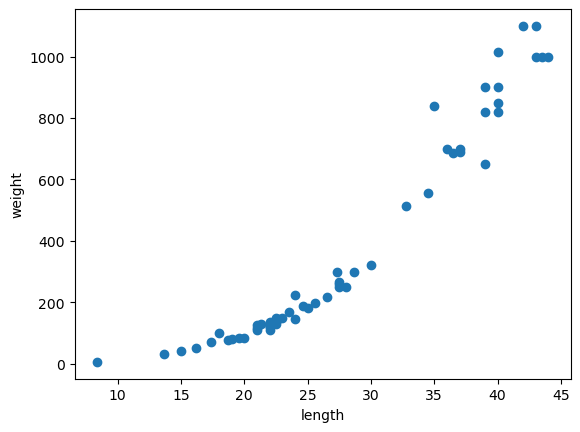

In [6]:
plt.figure()

plt.scatter(df["Length2"], df["Weight"])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 길이가 길어짐에 따라 무게가 증가하는 경향이 있음

In [7]:
# 데이터 분할(75: 25)
x_train, x_test, y_train, y_test = train_test_split(
    df["Length2"], df["Weight"], test_size=0.25, random_state=8
)

In [8]:
x_train

72      8.4
102    27.3
126    43.5
125    43.0
114    37.0
118    39.0
119    40.0
83     21.0
89     22.0
108    30.0
123    42.0
107    28.7
78     18.7
74     15.0
122    40.0
110    34.5
116    39.0
115    37.0
79     19.0
76     17.4
124    43.0
111    35.0
86     22.0
90     22.0
106    28.0
101    26.5
87     22.0
81     20.0
85     21.3
99     25.0
82     21.0
93     22.7
117    39.0
112    36.5
91     22.5
80     19.6
98     24.6
77     18.0
113    36.0
121    40.0
92     22.5
75     16.2
Name: Length2, dtype: float64

In [9]:
# 독립변수는 2차원 배열이어야함
x_train = np.reshape(x_train.values, (-1,1))

In [10]:
x_train

array([[ 8.4],
       [27.3],
       [43.5],
       [43. ],
       [37. ],
       [39. ],
       [40. ],
       [21. ],
       [22. ],
       [30. ],
       [42. ],
       [28.7],
       [18.7],
       [15. ],
       [40. ],
       [34.5],
       [39. ],
       [37. ],
       [19. ],
       [17.4],
       [43. ],
       [35. ],
       [22. ],
       [22. ],
       [28. ],
       [26.5],
       [22. ],
       [20. ],
       [21.3],
       [25. ],
       [21. ],
       [22.7],
       [39. ],
       [36.5],
       [22.5],
       [19.6],
       [24.6],
       [18. ],
       [36. ],
       [40. ],
       [22.5],
       [16.2]])

In [11]:
x_test = np.reshape(x_test.values, (-1, 1))

## 모델 훈련

In [12]:
knr = KNeighborsRegressor()

In [13]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

# 모델 평가

- 결정 계수
    - 계산식
        - 1 - ((sum((타깃 - 예측)^2) / sum((타깃 - 타깃평균)^2)))
    
    - 모델의 설명력을 뜻함
    - 1에 가까울수록 모델 성능이 좋다


In [17]:
# 모델의 결정계수
knr.score(x_test, y_test)

0.9813921192863494

- mean_absolute_error
    - 타깃의 예측과 절댓값 오차를 편균하여 반환


In [20]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [19]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)
mae

27.82142857142858

In [22]:
pred_df = pd.DataFrame({"ans": y_test, "pred": pred})
pred_df

,ans,pred
96,225.0,158.6
95,170.0,146.6
84,125.0,122.0
88,130.0,123.0
120,900.0,881.0
127,1000.0,1010.0
97,145.0,158.6
73,32.0,67.9
94,150.0,133.0
105,250.0,277.6


<img src = "./img/KNN_VS_LINEAR.png">

In [24]:
# 독립변수의 최댓ㄱ밧
max(x_train)

array([43.5])

In [25]:
# 50cm 농어에 대한 무게 예측
knr.predict([[50]])


array([1010.])

In [32]:
max(y_train)

1100.0

In [30]:
# 50cm 농어의 이웃찾기
dist, idx = knr.kneighbors([[50]])

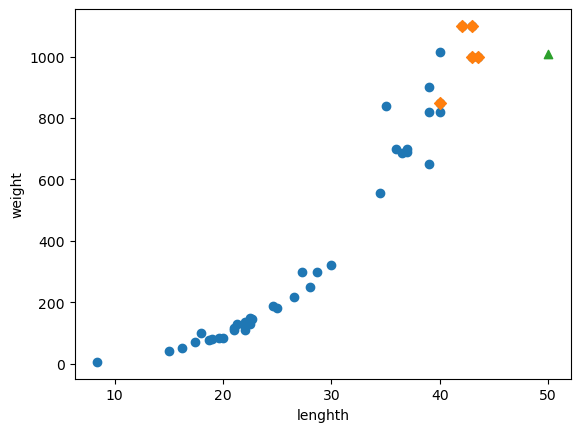

In [33]:
# 산점도 그리기
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_train[idx],y_train.iloc[idx.flatten()], marker="D")
plt.scatter(50, 1010, marker="^")

plt.xlabel("lenghth")
plt.ylabel("weight")
plt.show()